# Dataset information for Clustering-
I choose the Famous Iris dataset.It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.
The columns in this dataset are:
   Id
   SepalLengthCm
   SepalWidthCm
   PetalLengthCm
   PetalWidthCm
   Species

In [1]:
# First, we'll import pandas and numpy a data processing and CSV file I/O library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("C:\\Users\\Ankur\\Desktop\\Clustering\\iris.csv")
iris.shape

(150, 6)

In [8]:
# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
# K means clustering

In [9]:
X = iris.iloc[:, 1:5].values
y = pd.Categorical(iris['Species']).codes

In [10]:
from sklearn.cluster import KMeans
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

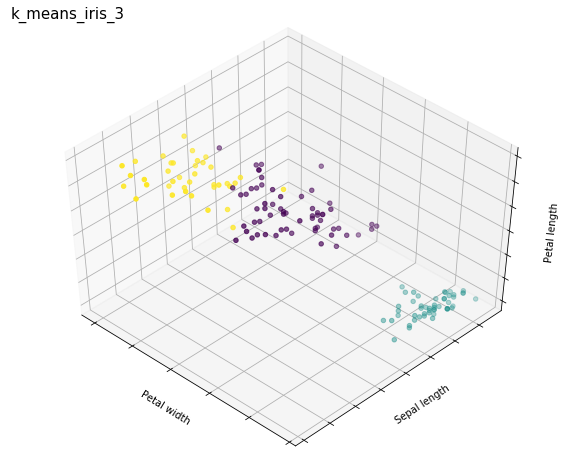

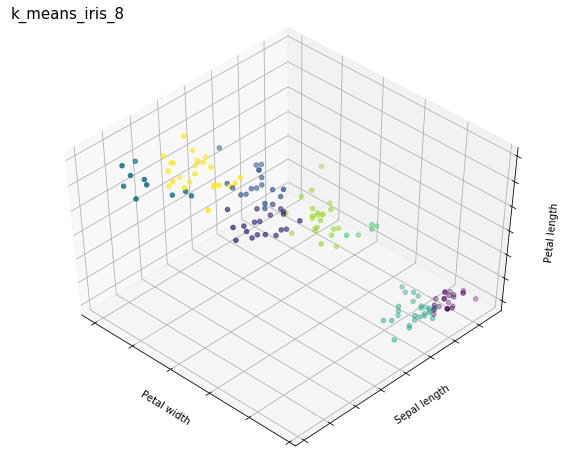

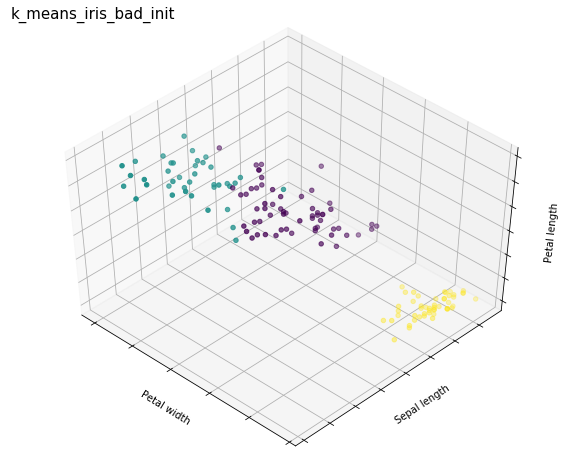

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8, 6))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(name, loc='left', fontsize=15)
    fignum = fignum + 1

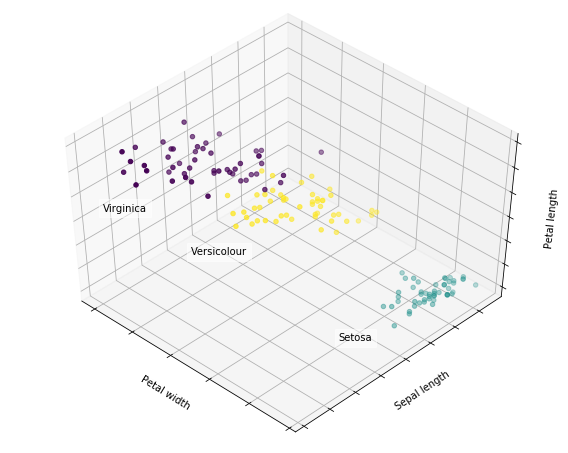

In [12]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

# Conclusion- 
The plots display firstly what a K-means algorithm would yield using three clusters. It is then shown what the effect of a bad initialization is on the classification process: By setting n_init to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. The next plot displays what using eight clusters would deliver and finally the ground truth.
k-Means Clustering is biased towards spherical distributions of clusters, and makes hard assignments to clusters, but is very fast (linear in number of features and data points).